In [2]:
# Load the data
data = pd.read_csv('C:/Users/syedf/Downloads/data.csv') 
data.fillna(data.mean(), inplace=True)
data.dropna(inplace=True)
data_numeric = data.select_dtypes(include=[np.number])

C:\Users\syedf\AppData\Local\Temp\ipykernel_51828\3556299655.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [3]:
pip install matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [3]:
# List of selected features
selected_features = [
    'co2_including_luc', 'cumulative_other_co2', 'ghg_excluding_lucf_per_capita',
    'land_use_change_co2', 'share_global_cumulative_other_co2',
    'co2_per_capita', 'share_global_cumulative_cement_co2', 'land_use_change_co2_per_capita',
    'co2_per_gdp', 'nitrous_oxide_per_capita', 'co2_including_luc_growth_abs', 'flaring_co2_per_capita',
    'coal_co2_per_capita', 'trade_co2_share', 'co2_growth_prct', 'co2_including_luc_growth_prct',
    'co2_including_luc_per_unit_energy', 'other_co2_per_capita', 'year', 'co2_including_luc_per_gdp',
    'cement_co2_per_capita', 'population', 'trade_co2', 'cumulative_flaring_co2', 'co2_growth_abs'
]

In [5]:
target = 'share_global_co2'
features = data_numeric.drop(columns=[target]).columns

X = data_numeric[selected_features]
y = data_numeric[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
svr = SVR()
svr.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_train = svr.predict(X_train_scaled)
y_pred_test = svr.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')


Training MSE: 10.394808302850285
Testing MSE: 10.315022232754016


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import joblib

# Load the data
data = pd.read_csv('C:/Users/syedf/Downloads/data.csv')
data.fillna(data.mean(), inplace=True)
data.dropna(inplace=True)
data_numeric = data.select_dtypes(include=[np.number])

# List of selected features
selected_features = [
    'co2_including_luc', 'cumulative_other_co2', 'ghg_excluding_lucf_per_capita',
    'land_use_change_co2', 'share_global_cumulative_other_co2',
    'co2_per_capita', 'share_global_cumulative_cement_co2', 'land_use_change_co2_per_capita',
    'co2_per_gdp', 'nitrous_oxide_per_capita', 'co2_including_luc_growth_abs', 'flaring_co2_per_capita',
    'coal_co2_per_capita', 'trade_co2_share', 'co2_growth_prct', 'co2_including_luc_growth_prct',
    'co2_including_luc_per_unit_energy', 'other_co2_per_capita', 'year', 'co2_including_luc_per_gdp',
    'cement_co2_per_capita', 'population', 'trade_co2', 'cumulative_flaring_co2', 'co2_growth_abs'
]
target = 'share_global_co2'

X = data_numeric[selected_features]
y = data_numeric[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model with specific hyperparameters
svr = SVR(C=100, gamma=0.05, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_train = svr.predict(X_train_scaled)
y_pred_test = svr.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')


C:\Users\syedf\AppData\Local\Temp\ipykernel_51828\1603992396.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Training MSE: 0.0029018706367476286
Testing MSE: 0.9013574974294902


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load the data
data = pd.read_csv('C:/Users/syedf/Downloads/data.csv')
data.fillna(data.mean(), inplace=True)
data.dropna(inplace=True)
data_numeric = data.select_dtypes(include=[np.number])

# List of selected features
selected_features = [
    'co2_including_luc', 'cumulative_other_co2', 'ghg_excluding_lucf_per_capita',
    'land_use_change_co2', 'share_global_cumulative_other_co2',
    'co2_per_capita', 'share_global_cumulative_cement_co2', 'land_use_change_co2_per_capita',
    'co2_per_gdp', 'nitrous_oxide_per_capita', 'co2_including_luc_growth_abs', 'flaring_co2_per_capita',
    'coal_co2_per_capita', 'trade_co2_share', 'co2_growth_prct', 'co2_including_luc_growth_prct',
    'co2_including_luc_per_unit_energy', 'other_co2_per_capita', 'year', 'co2_including_luc_per_gdp',
    'cement_co2_per_capita', 'population', 'trade_co2', 'cumulative_flaring_co2', 'co2_growth_abs'
]
target = 'share_global_co2'

X = data_numeric[selected_features]
y = data_numeric[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model with specific hyperparameters
svr = SVR(C=100, gamma=0.05, epsilon=0.01)
svr.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_train = svr.predict(X_train_scaled)
y_pred_test = svr.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Calculate additional metrics
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print the aggregated metrics
print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')

print(f'Training MAE: {train_mae}')
print(f'Testing MAE: {test_mae}')

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

print(f'Training R2: {train_r2}')
print(f'Testing R2: {test_r2}')


C:\Users\syedf\AppData\Local\Temp\ipykernel_51828\1141743300.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Training MSE: 0.00019393641892473534
Testing MSE: 0.9829618512495586
Training MAE: 0.0057046710379239215
Testing MAE: 0.0945484289973015
Training RMSE: 0.013926105662558192
Testing RMSE: 0.991444325844653
Training R2: 0.9999938861058278
Testing R2: 0.9698004405675645


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load the data
data = pd.read_csv('C:/Users/syedf/Downloads/data.csv')
data.fillna(data.mean(), inplace=True)
data.dropna(inplace=True)
data_numeric = data.select_dtypes(include=[np.number])

# List of selected features
selected_features = [
    'co2_including_luc', 'cumulative_other_co2', 'ghg_excluding_lucf_per_capita',
    'land_use_change_co2', 'share_global_co2', 'share_global_cumulative_other_co2',
    'co2_per_capita', 'share_global_cumulative_cement_co2', 'land_use_change_co2_per_capita',
    'co2_per_gdp', 'nitrous_oxide_per_capita', 'co2_including_luc_growth_abs', 'flaring_co2_per_capita',
    'coal_co2_per_capita', 'trade_co2_share', 'co2_growth_prct', 'co2_including_luc_growth_prct',
    'co2_including_luc_per_unit_energy', 'other_co2_per_capita', 'year', 'co2_including_luc_per_gdp',
    'cement_co2_per_capita', 'population', 'trade_co2', 'cumulative_flaring_co2', 'co2_growth_abs'
]
target = 'share_global_co2'

X = data_numeric[selected_features]
y = data_numeric[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model with specific hyperparameters
svr = SVR(C=100, gamma=0.05, epsilon=0.01)
svr.fit(X_train_scaled, y_train)

# Predict using the model
y_pred_test = svr.predict(X_test_scaled)

# Calculate aggregated metrics
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print the aggregated metrics
print(f"Aggregated MAE: {mae}")
print(f"Aggregated MSE: {mse}")
print(f"Aggregated RMSE: {rmse}")
print(f"Aggregated R2: {r2}")


C:\Users\syedf\AppData\Local\Temp\ipykernel_43240\695748704.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Aggregated MAE: 0.09382585698329673
Aggregated MSE: 0.9072231709627132
Aggregated RMSE: 0.952482635517684
Aggregated R2: 0.9718622932195284


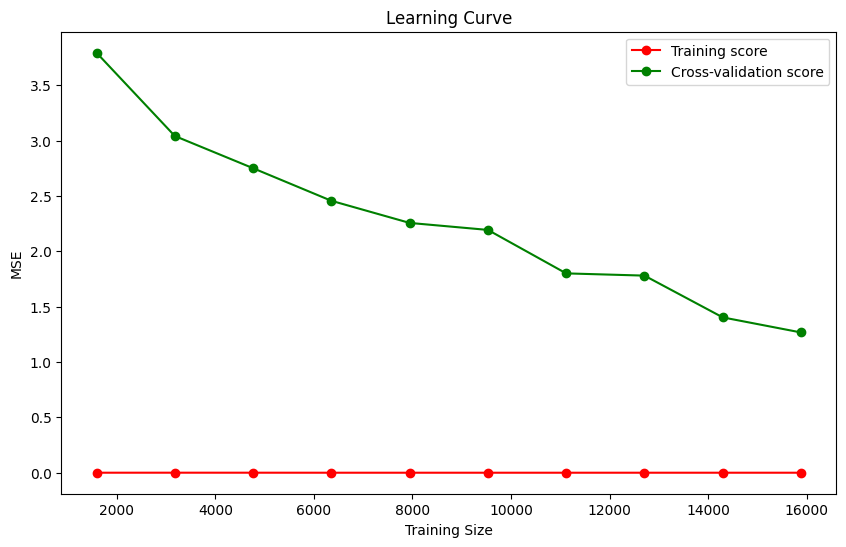

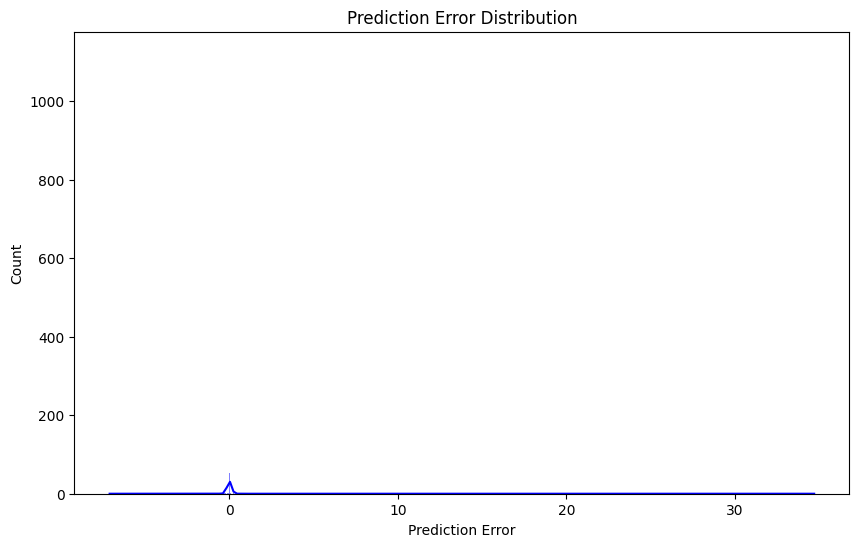

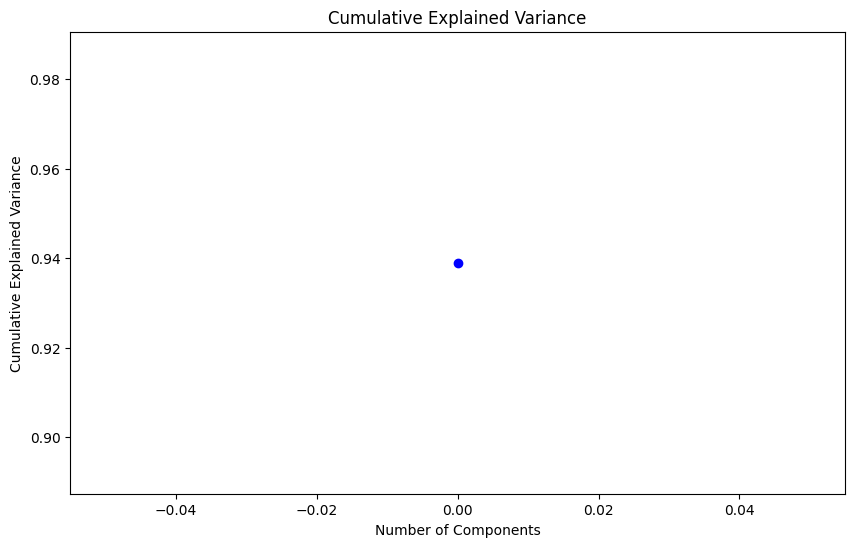

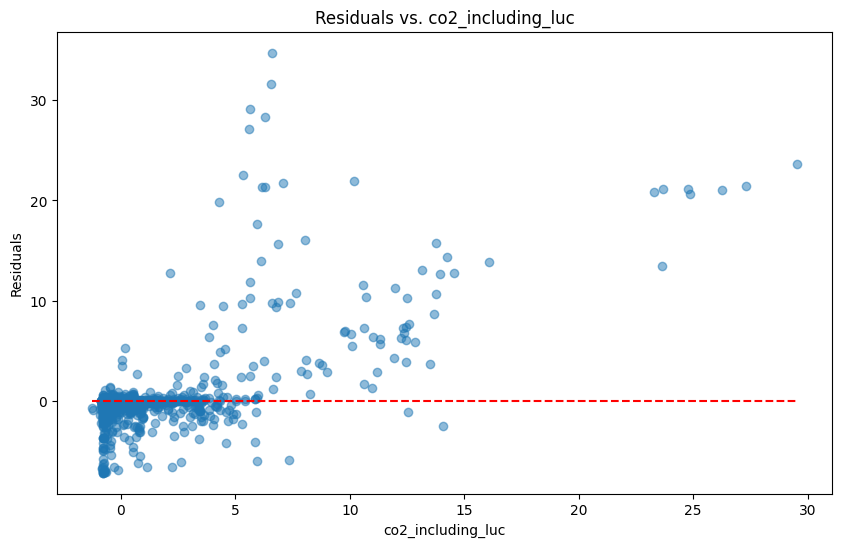

In [23]:
import numpy as np
from sklearn.model_selection import learning_curve

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(SVR(C=100, gamma=0.05, epsilon=0.01), 
                                                        X_train_scaled, y_train, 
                                                        cv=5, scoring='neg_mean_squared_error', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

# Prediction Error Distribution
errors = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue')
plt.xlabel('Prediction Error')
plt.title('Prediction Error Distribution')
plt.show()

# Cumulative Explained Variance (Not typically for SVR, more common in PCA but useful to see the explained variance by features)
explained_variance = np.var(y_pred_test) / np.var(y_test)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum([explained_variance]), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

# Residuals vs. Feature (taking first feature as an example)
feature_index = 0  # Change this index to check for other features
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, feature_index], residuals, alpha=0.5)
plt.hlines(y=0, xmin=X_test_scaled[:, feature_index].min(), xmax=X_test_scaled[:, feature_index].max(), colors='r', linestyles='dashed')
plt.xlabel(selected_features[feature_index])
plt.ylabel('Residuals')
plt.title(f'Residuals vs. {selected_features[feature_index]}')
plt.show()


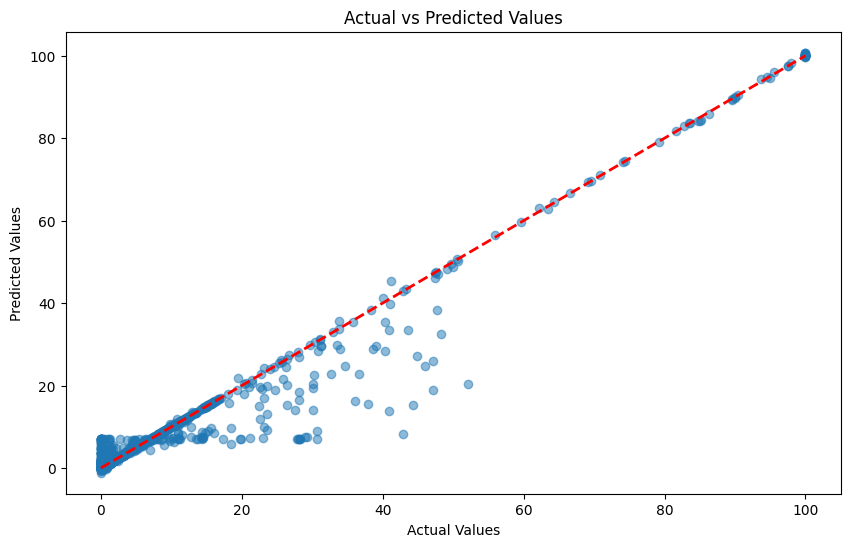

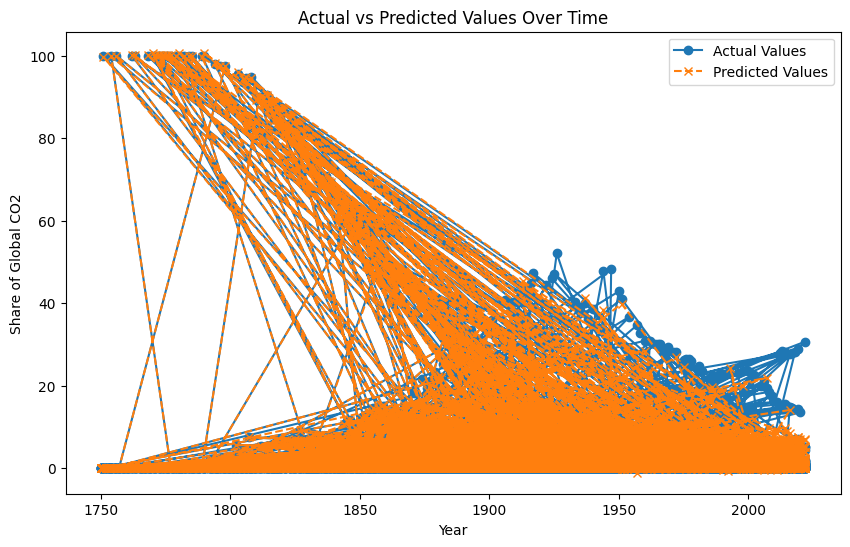

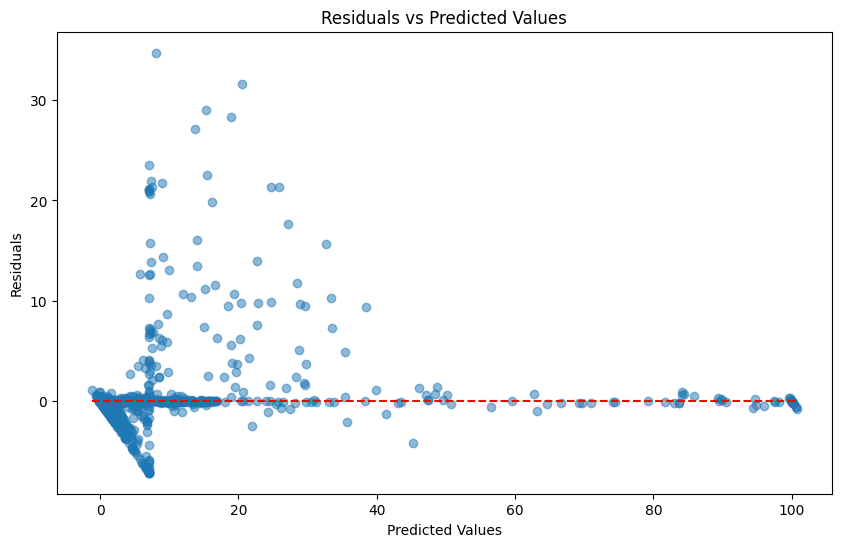

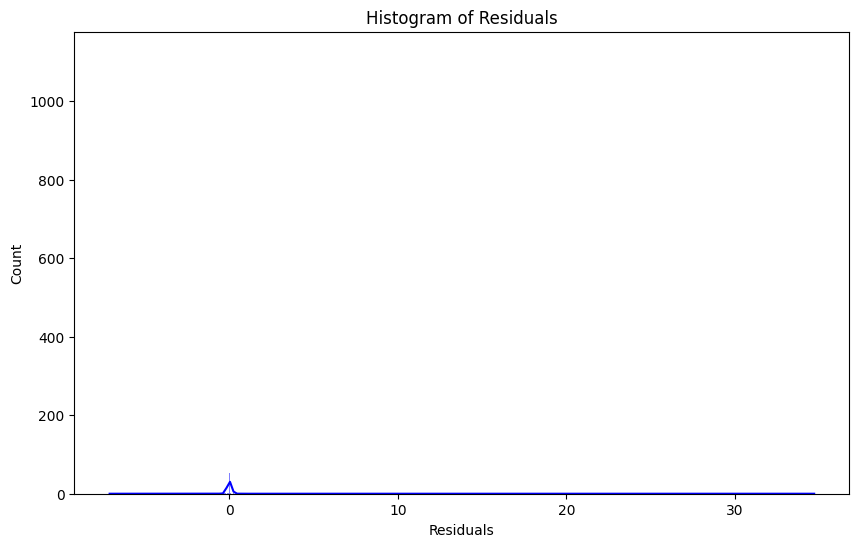

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Line Plot of Actual vs Predicted Values Over Time (Year)
plt.figure(figsize=(10, 6))
plt.plot(data_numeric['year'][y_test.index], y_test, label='Actual Values', marker='o', linestyle='-')
plt.plot(data_numeric['year'][y_test.index], y_pred_test, label='Predicted Values', marker='x', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Share of Global CO2')
plt.title('Actual vs Predicted Values Over Time')
plt.legend()
plt.show()

# Residual Plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_test.min(), xmax=y_pred_test.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()


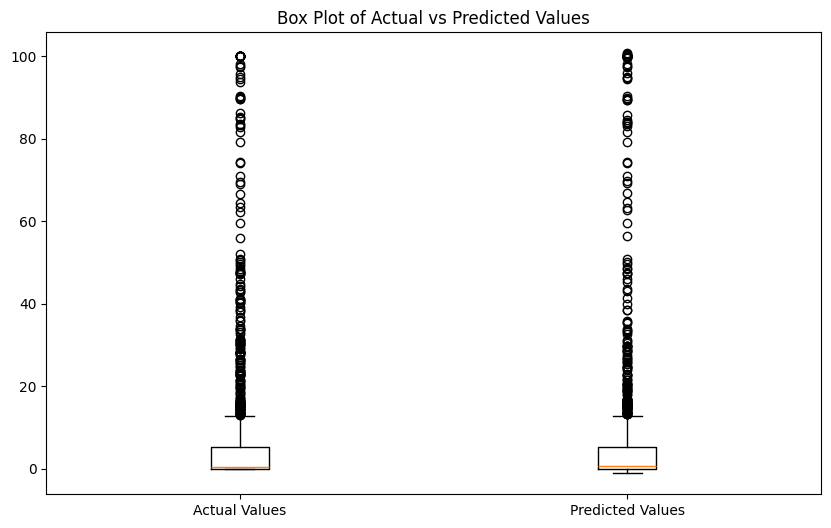

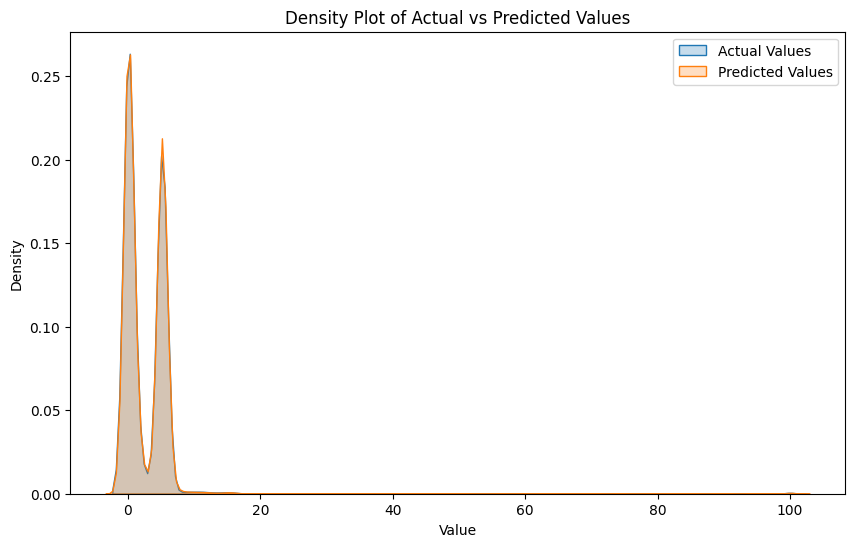

NameError: name 'residuals' is not defined

<Figure size 1000x600 with 0 Axes>

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.boxplot([y_test, y_pred_test], labels=['Actual Values', 'Predicted Values'])
plt.title('Box Plot of Actual vs Predicted Values')
plt.show()

# Density Plot of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Values', fill=True)
sns.kdeplot(y_pred_test, label='Predicted Values', fill=True)
plt.xlabel('Value')
plt.title('Density Plot of Actual vs Predicted Values')
plt.legend()
plt.show()

# QQ Plot of Residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

# Cumulative Gain Chart
def plot_cumulative_gain(y_true, y_pred):
    sorted_indices = np.argsort(y_pred)[::-1]
    y_true_sorted = y_true.iloc[sorted_indices]
    
    cum_gains = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    baseline = np.linspace(0, 1, len(y_true_sorted))

    plt.figure(figsize=(10, 6))
    plt.plot(cum_gains, label='Cumulative Gain')
    plt.plot(baseline, label='Baseline', linestyle='--')
    plt.xlabel('Number of Samples')
    plt.ylabel('Cumulative Gain')
    plt.title('Cumulative Gain Chart')
    plt.legend()
    plt.show()

plot_cumulative_gain(y_test, y_pred_test)


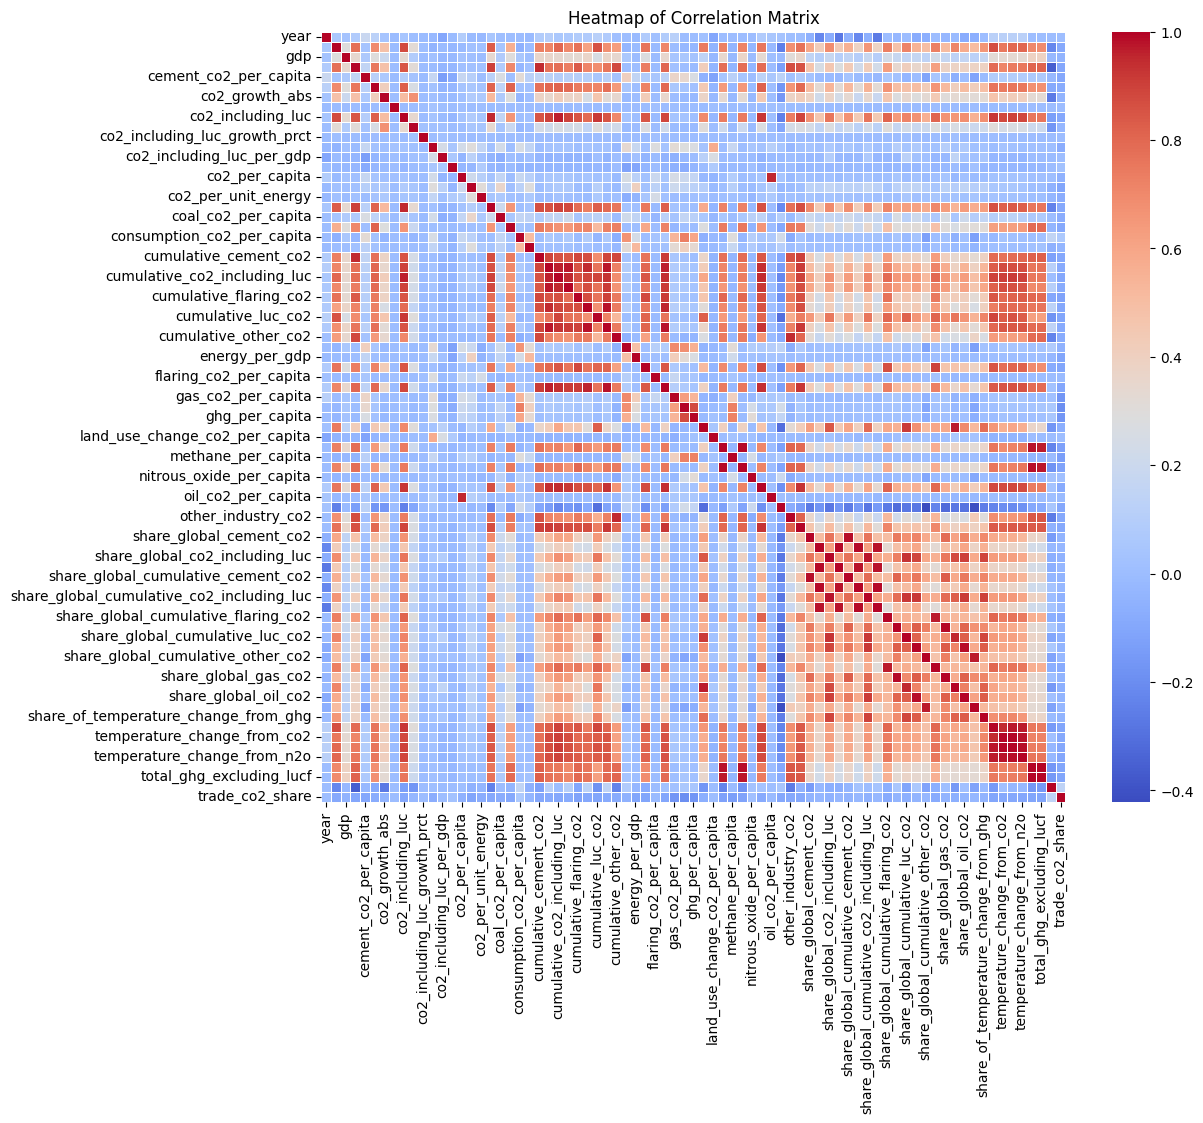

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = data_numeric.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [44]:
# Load the data
data = pd.read_csv('C:/Users/syedf/Downloads/data.csv')
data.fillna(data.mean(), inplace=True)
data.dropna(inplace=True)
data_numeric = data.select_dtypes(include=[np.number])

# Define features and target
selected_features = [
    'co2_including_luc', 'cumulative_other_co2', 'ghg_excluding_lucf_per_capita',
    'land_use_change_co2', 'share_global_co2', 'share_global_cumulative_other_co2',
    'co2_per_capita', 'share_global_cumulative_cement_co2', 'land_use_change_co2_per_capita',
    'co2_per_gdp', 'nitrous_oxide_per_capita', 'co2_including_luc_growth_abs', 'flaring_co2_per_capita',
    'coal_co2_per_capita', 'trade_co2_share', 'co2_growth_prct', 'co2_including_luc_growth_prct',
    'co2_including_luc_per_unit_energy', 'other_co2_per_capita', 'year', 'co2_including_luc_per_gdp',
    'cement_co2_per_capita', 'population', 'trade_co2', 'cumulative_flaring_co2', 'co2_growth_abs'
]
target = 'share_global_co2'

X = data_numeric[selected_features]
y = data_numeric[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C:\Users\syedf\AppData\Local\Temp\ipykernel_43240\1233963467.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R2': r2}


C:\Users\syedf\AppData\Local\Temp\ipykernel_43240\460985452.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(model_names, rotation=45)
C:\Users\syedf\AppData\Local\Temp\ipykernel_43240\460985452.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(model_names, rotation=45)


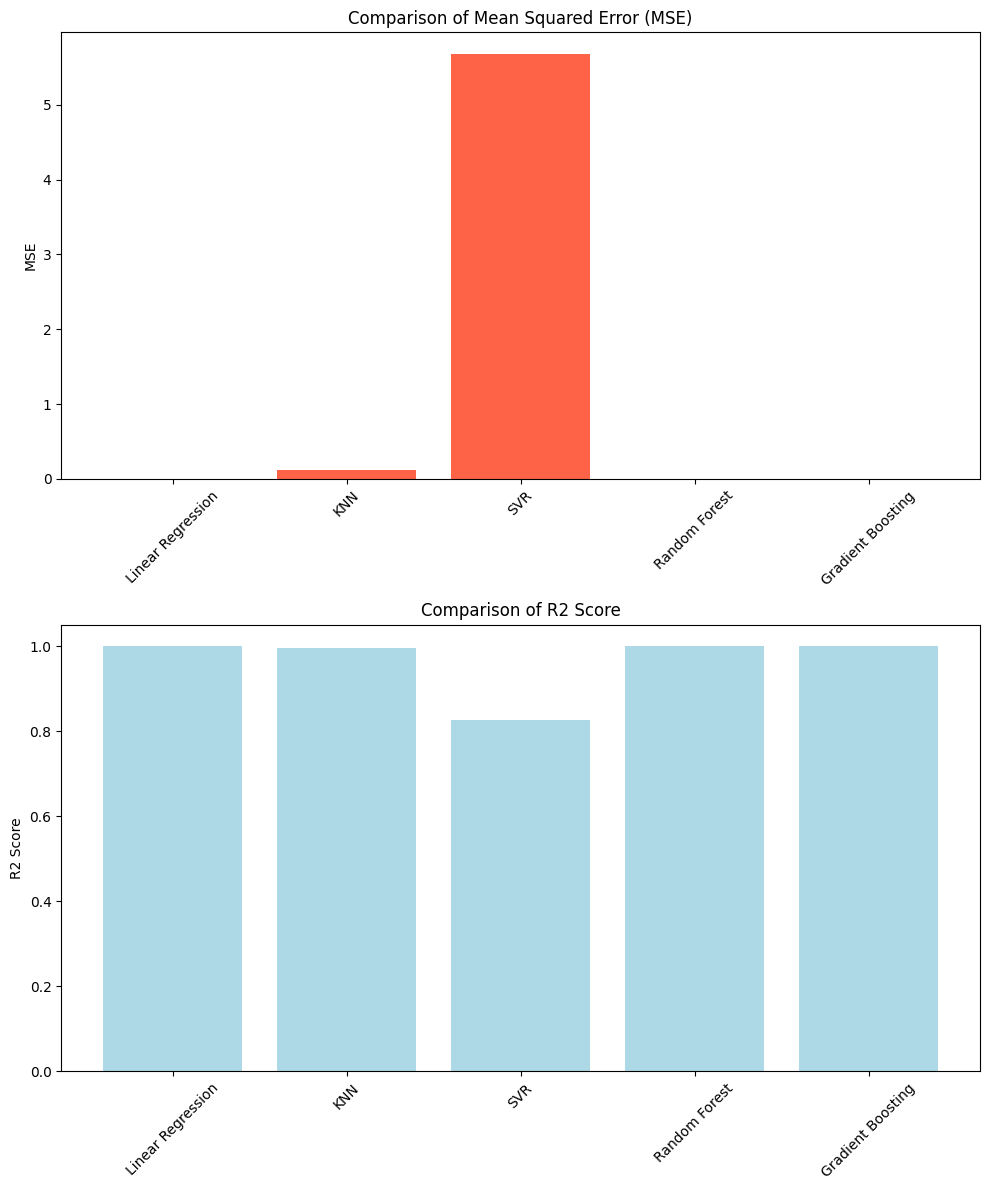

In [47]:
# Data for plotting
model_names = results.keys()
mse_scores = [results[name]['MSE'] for name in model_names]
r2_scores = [results[name]['R2'] for name in model_names]

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot MSE
ax[0].bar(model_names, mse_scores, color='tomato')
ax[0].set_title('Comparison of Mean Squared Error (MSE)')
ax[0].set_ylabel('MSE')
ax[0].set_xticklabels(model_names, rotation=45)

# Plot R2
ax[1].bar(model_names, r2_scores, color='lightblue')
ax[1].set_title('Comparison of R2 Score')
ax[1].set_ylabel('R2 Score')
ax[1].set_xticklabels(model_names, rotation=45)

plt.tight_layout()
plt.show()


C:\Users\syedf\AppData\Local\Temp\ipykernel_43240\968982678.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Model Performance [MSE]:
Linear Regression - MSE: 0.0000
KNN - MSE: 0.1252
SVR - MSE: 5.6831
Random Forest - MSE: 0.0018
XGBoost - MSE: 0.0309


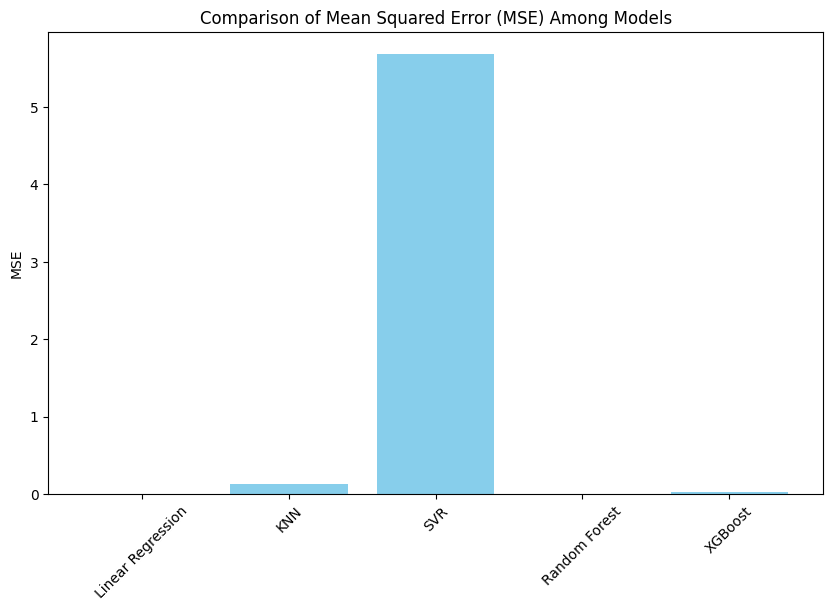

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('C:/Users/syedf/Downloads/data.csv')
data.fillna(data.mean(), inplace=True)
data.dropna(inplace=True)
data_numeric = data.select_dtypes(include=[np.number])

# Define features and target
selected_features = [
    'co2_including_luc', 'cumulative_other_co2', 'ghg_excluding_lucf_per_capita',
    'land_use_change_co2', 'share_global_co2', 'share_global_cumulative_other_co2',
    'co2_per_capita', 'share_global_cumulative_cement_co2', 'land_use_change_co2_per_capita',
    'co2_per_gdp', 'nitrous_oxide_per_capita', 'co2_including_luc_growth_abs', 'flaring_co2_per_capita',
    'coal_co2_per_capita', 'trade_co2_share', 'co2_growth_prct', 'co2_including_luc_growth_prct',
    'co2_including_luc_per_unit_energy', 'other_co2_per_capita', 'year', 'co2_including_luc_per_gdp',
    'cement_co2_per_capita', 'population', 'trade_co2', 'cumulative_flaring_co2', 'co2_growth_abs'
]
target = 'share_global_co2'

X = data_numeric[selected_features]
y = data_numeric[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror')
}

# Train models and calculate MSE
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    results[name] = mse

# Output results
print("Model Performance [MSE]:")
for name, mse in results.items():
    print(f"{name} - MSE: {mse:.4f}")

# Plotting results
model_names = list(results.keys())
mse_scores = [results[name] for name in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_scores, color='skyblue')
plt.title('Comparison of Mean Squared Error (MSE) Among Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()


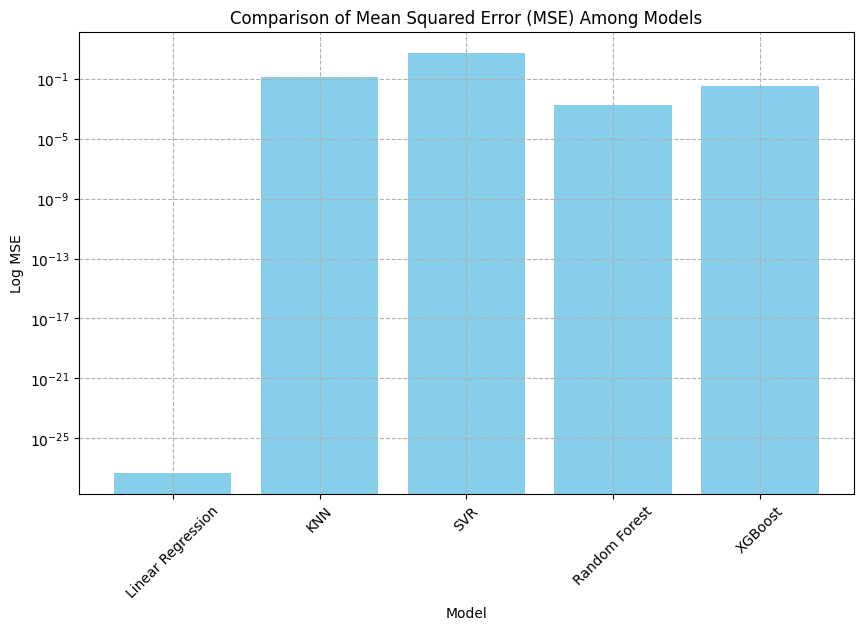

In [53]:
import matplotlib.pyplot as plt

# Assuming 'results' is your dictionary with models as keys and MSE as values
model_names = list(results.keys())
mse_scores = [results[name] for name in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_scores, color='skyblue')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.title('Comparison of Mean Squared Error (MSE) Among Models')
plt.ylabel('Log MSE')
plt.xlabel('Model')
plt.xticks(rotation=45)  # Rotate model names for better visibility
plt.grid(True, which="both", ls="--")  # Add gridlines for better readability
plt.show()
